# Tarea  3  Algoritmos de Aprendizaje Supervisado 
---
## Estudiante: Gabriel Orlando Cuentas Torres
---
Dataset Arboles de Decisión – Red Wine Quality
---
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el "3" modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 
5. Entrenar el modelo configurando los diferentes hiperparámetros. 
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Cargamos el dataset y mostramos las 50 primeras filas
Datos = pd.read_csv('./winequality-red.csv')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,Acidez fija,Acidez volatil,Acido critico,Azucar residual,Cloruro,Dioxido de azufre libre,Dioxido de azufre total,Densidad,pH,Sulfatos,alcohol,Calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# Descripción de los datos
Datos.describe()

,Acidez fija,Acidez volatil,Acido critico,Azucar residual,Cloruro,Dioxido de azufre libre,Dioxido de azufre total,Densidad,pH,Sulfatos,alcohol,Calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
Datos.shape

(1599, 12)

In [6]:
Datos.isna().sum()

Acidez fija                0
Acidez volatil             0
Acido critico              0
Azucar residual            0
Cloruro                    0
Dioxido de azufre libre    0
Dioxido de azufre total    0
Densidad                   0
pH                         0
Sulfatos                   0
alcohol                    0
Calidad                    0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

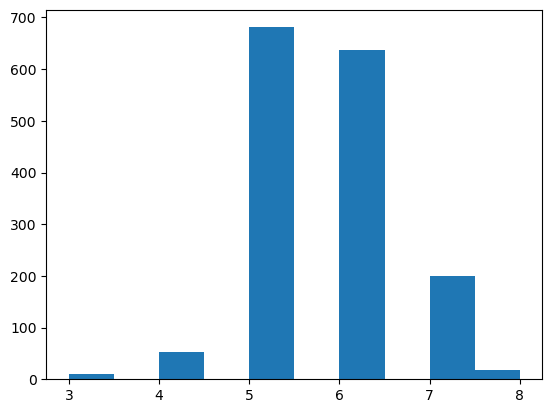

In [7]:
plt.hist(Datos.Calidad)

<Axes: xlabel='Densidad', ylabel='pH'>

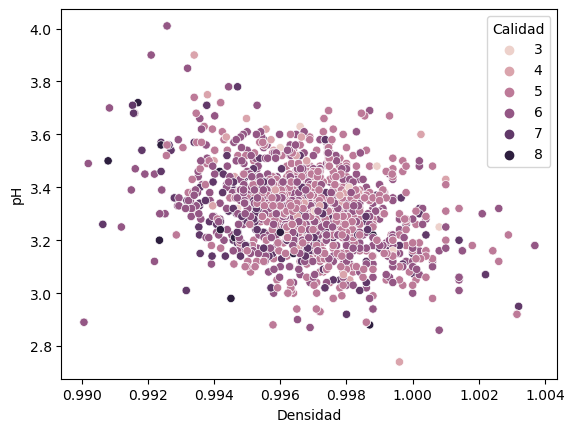

In [8]:
sns.scatterplot(x="Densidad", y="pH", hue="Calidad", data=Datos)

In [9]:
predictors_col=["Densidad", "pH", "Sulfatos", "alcohol"]
target_col=['Calidad']

In [10]:
predictors=Datos[predictors_col]
target=Datos[target_col]

In [11]:
predictors

,Densidad,pH,Sulfatos,alcohol
0,0.99780,3.51,0.56,9.4
1,0.99680,3.20,0.68,9.8
2,0.99700,3.26,0.65,9.8
3,0.99800,3.16,0.58,9.8
4,0.99780,3.51,0.56,9.4
...,...,...,...,...
1594,0.99490,3.45,0.58,10.5
1595,0.99512,3.52,0.76,11.2
1596,0.99574,3.42,0.75,11.0
1597,0.99547,3.57,0.71,10.2


In [12]:
target

,Calidad
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [13]:
corr=predictors.corr()
corr

,Densidad,pH,Sulfatos,alcohol
Densidad,1.000000,-0.341699,0.148506,-0.496180
pH,-0.341699,1.000000,-0.196648,0.205633
Sulfatos,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.496180,0.205633,0.093595,1.000000


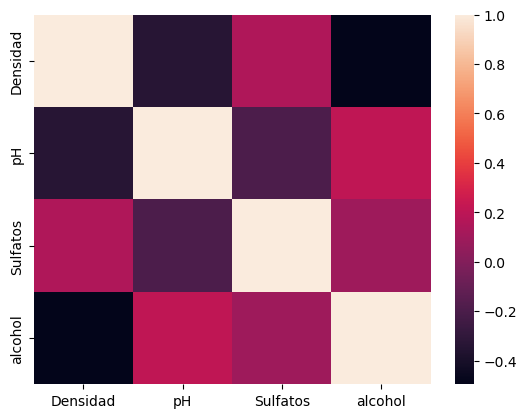

In [14]:
sns.heatmap(corr)
plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.28, random_state= 13)

In [16]:
tree=DecisionTreeClassifier()

In [17]:
arbol=tree.fit(x_train, y_train)

[Text(0.5278808270598941, 0.9736842105263158, 'x[3] <= 10.525\ngini = 0.644\nsamples = 1151\nvalue = [8, 40, 481, 466, 145, 11]'),
 Text(0.2195604628557247, 0.9210526315789473, 'x[2] <= 0.535\ngini = 0.542\nsamples = 696\nvalue = [5, 26, 406, 236, 23, 0]'),
 Text(0.05228325612177366, 0.868421052631579, 'x[3] <= 9.533\ngini = 0.374\nsamples = 170\nvalue = [2, 13, 132, 22, 1, 0]'),
 Text(0.02316346790205162, 0.8157894736842105, 'x[3] <= 9.075\ngini = 0.219\nsamples = 83\nvalue = [0, 5, 73, 5, 0, 0]'),
 Text(0.010589013898080741, 0.7631578947368421, 'x[2] <= 0.48\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.005294506949040371, 0.7105263157894737, 'x[0] <= 0.997\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.0026472534745201853, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.007941760423560556, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.01588352084712111, 0.7105263157894737, 

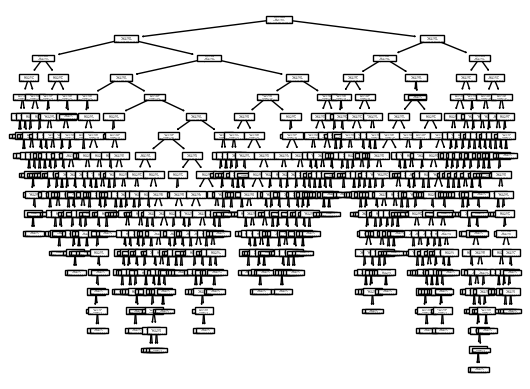

In [18]:
plot_tree(arbol)

In [19]:
predicciones=arbol.predict(x_test)

In [20]:
predicciones

array([7, 4, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 6, 7, 6, 6, 7, 5, 6, 5, 6,
       7, 5, 6, 5, 5, 4, 5, 7, 6, 6, 5, 6, 4, 6, 5, 5, 5, 7, 5, 5, 6, 6,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7,
       6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 7, 6,
       5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 7, 6, 5, 7, 7, 6, 6, 5, 7,
       4, 6, 5, 6, 5, 6, 7, 7, 5, 7, 5, 5, 5, 8, 6, 5, 5, 5, 6, 7, 6, 5,
       6, 7, 7, 5, 7, 5, 6, 7, 6, 5, 5, 7, 6, 4, 6, 5, 6, 5, 5, 8, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 6, 6, 4, 6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 8, 7,
       5, 5, 6, 6, 5, 7, 6, 7, 6, 5, 5, 6, 6, 5, 5, 6, 7, 5, 6, 7, 5, 7,
       5, 5, 5, 5, 5, 6, 5, 4, 4, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 4, 6,
       6, 4, 5, 6, 8, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 7, 6, 8, 4, 5,
       6, 6, 6, 7, 5, 5, 7, 5, 5, 7, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5,
       7, 7, 5, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 5, 5,

In [21]:
# Examinamos la matriz de confusión

pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['actual'], colnames=['predicciones'])

predicciones,3,4,5,6,7,8
actual,,,,,,
3,0,0,2,0,0,0
4,1,4,7,1,0,0
5,0,9,133,50,6,2
6,0,4,46,100,19,3
7,0,0,8,21,22,3
8,0,0,0,5,2,0


In [22]:
accuracy=accuracy_score(y_test,predicciones)
accuracy

0.578125